In [1]:
import pandas as pd
from tepackage.data_preprocessing import DataScaler
from tepackage.data_reducer import DataReducer, Reducer, plot_reduced_data
from tepackage.data_treatment import Clusterer, DataClusterer, plot_clustering_2d

%matplotlib inline

In [2]:
df = pd.read_excel('data/RawData.xlsx', index_col=0)

df.head(5)


,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,XMEAS10,...,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11,XMV12
1,0.271033,3649.739415,4451.320791,9.223142,32.392900,47.559754,2798.975799,64.995825,122.898796,0.197826,...,26.662173,60.482854,0,24.229301,37.208198,46.430526,0,35.865322,12.930642,100
2,0.270826,3653.341885,4488.640140,9.211980,32.501953,47.374855,2800.296214,65.091251,122.877519,0.196092,...,26.689544,60.524644,0,24.171763,37.227431,46.427192,0,35.719177,11.714423,100
3,0.270474,3688.113265,4432.832766,9.235690,32.402838,47.817088,2802.647777,64.812363,122.916165,0.204023,...,26.705507,60.546193,0,25.179022,37.243766,46.442544,0,35.740715,10.734676,100
4,0.272127,3651.680041,4459.268940,9.192009,31.876790,47.869249,2803.693084,64.205417,122.892493,0.220561,...,26.768653,60.568588,0,26.922729,37.211698,46.407497,0,35.736154,10.311783,100
5,0.270939,3636.329271,4460.409756,9.277992,32.424754,47.509322,2804.787223,64.598623,122.890514,0.236146,...,26.396773,60.637598,0,29.039605,37.199517,46.424034,0,35.890716,11.181380,100


In [3]:
scaler = DataScaler(df.values)

normalized_data = scaler.get_transformed_data()

normalized_data.shape

(1995, 53)

# Reducing dimension using Locally Linear Embedding

ref: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html

/tmp/ipykernel_135662/486656823.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


(1995, 2)

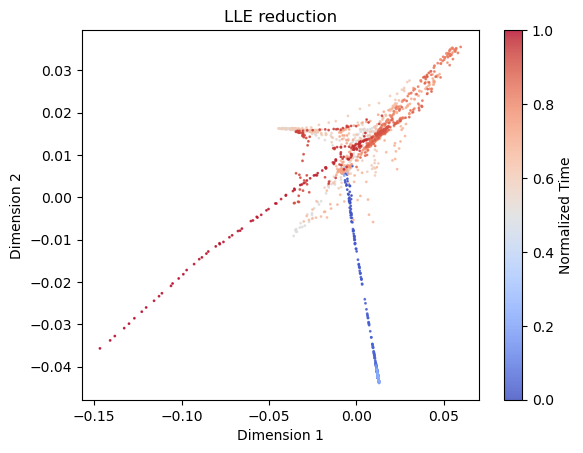

In [21]:
reducer = DataReducer(Reducer.lle, 2)

reduced_data = reducer.reduce(normalized_data, n_neighbors=95,reg=1e-2, neighbors_algorithm='kd_tree', eigen_solver='auto')


fig = plot_reduced_data(reduced_data, 'LLE reduction')
fig.show()
reduced_data.shape

/home/mvper/micromamba/envs/che_4230_env/lib/python3.12/site-packages/tepackage/data_treatment.py:97: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('4').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(
/home/mvper/micromamba/envs/che_4230_env/lib/python3.12/site-packages/tepackage/data_treatment.py:97: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('3').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(
/home/mvper/micromamba/envs/che_4230_env/lib/python3.12/site-packages/tepackage/data_treatment.py:97: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('2').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(
/home/mvper/micromamba/envs/che_4230_env/lib/python3.12/site-packages/tepackage/da

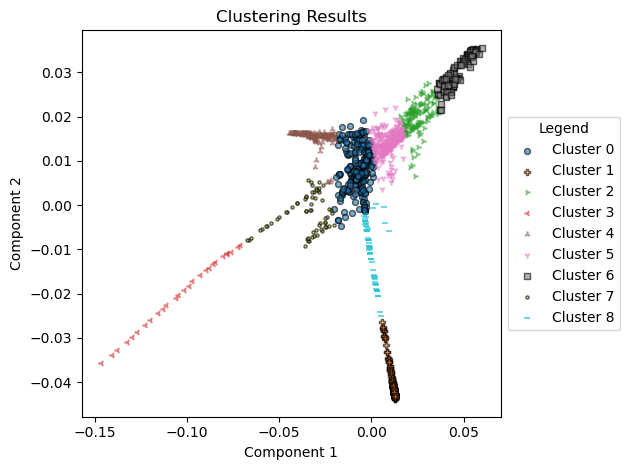

In [22]:
clusterer = DataClusterer(Clusterer.kmeans)
clusterer.clusterize(reduced_data, n_clusters=9)
plot = plot_clustering_2d(reduced_data, clusterer.cluster_labels, s=20, edgecolor='k', alpha=0.6)

plot.show()


# Clustering using HDBSCAN

HDBScan is a **hierarchical** density-based clustering algorithm

Ref: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.HDBSCAN.html

Please see ref for possible kwargs arguments

/tmp/ipykernel_135662/2762467531.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.show()


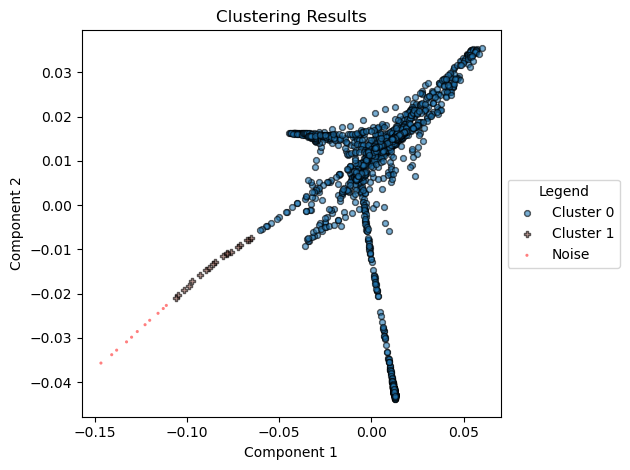

In [30]:
clusterer = DataClusterer(Clusterer.hdbscan)
clusterer.clusterize(reduced_data, min_cluster_size=10, min_samples=2, cluster_selection_epsilon=.02)
plot = plot_clustering_2d(reduced_data, clusterer.cluster_labels, s=20, edgecolor='k', alpha=0.6)

plot.show()

# Clustering using DBSCAN

DBScan is a density-based clustering algorithm

Ref: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

Please see ref for possible kwargs arguments

/tmp/ipykernel_135662/1697635172.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.show()


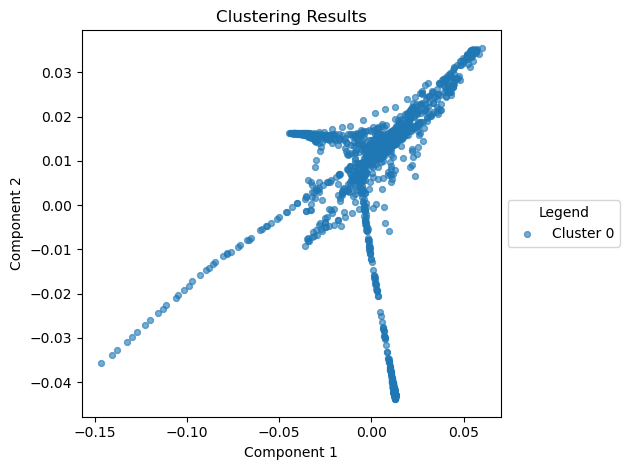

In [34]:
clusterer = DataClusterer(Clusterer.dbscan)
clusterer.clusterize(reduced_data, eps=0.2, min_samples=2)

plot = plot_clustering_2d(reduced_data, clusterer.cluster_labels, s=20,  alpha=0.6)
plot.show()